In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
file_paths = ["surfline_crawl/法國大溪地.csv", "surfline_crawl/台東東河.csv", "surfline_crawl/台東金樽.csv", "surfline_crawl/印尼峇里島.csv"
              ,"surfline_crawl/宜蘭烏石港.csv", "surfline_crawl/澳洲.csv", "surfline_crawl/恆春南灣.csv"]  # Replace with your file paths
data_list = [pd.read_csv(file) for file in file_paths]
data = pd.concat(data_list, ignore_index=True)

In [15]:
data['swell_height_averages'] = data[['swells_0_height', 'swells_1_height', 'swells_2_height',
                               'swells_3_height', 'swells_4_height', 'swells_5_height']].replace(0, pd.NA).mean(axis=1)

線性回歸

In [16]:
# One-Hot Encoding for 'directionType'
data = pd.get_dummies(data, columns=['directionType'], drop_first=True)
data

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,speed,direction,gust,optimalScore,temperature,condition,pressure,swell_height_averages,directionType_Offshore,directionType_Onshore
0,2024-12-23 10:00:00,1734948000,100.000000,-10,0.9,1.4,2,False,Waist to shoulder,1.02934,...,13.20355,241.97163,13.32000,0,25.63822,NIGHT_THUNDER_SHOWERS,1014,0.726667,True,False
1,2024-12-23 13:00:00,1734958800,100.000000,-10,1.2,1.5,2,False,Chest to head,1.24920,...,9.33025,270.74581,9.33025,0,25.51426,NIGHT_BRIEF_SHOWERS_POSSIBLE,1013,0.7,False,False
2,2024-12-23 16:00:00,1734969600,100.000000,-10,1.2,1.5,2,False,Chest to head,1.35913,...,9.57892,252.52154,9.57892,0,25.73760,THUNDER_SHOWERS,1015,0.705,False,False
3,2024-12-23 19:00:00,1734980400,100.000000,-10,0.9,1.4,2,False,Waist to shoulder,1.19923,...,9.01660,289.70456,9.02605,0,25.62715,CLEAR,1016,0.706667,False,False
4,2024-12-23 22:00:00,1734991200,100.000000,-10,0.9,1.4,2,False,Waist to shoulder,1.15925,...,10.66988,294.83811,10.66988,0,25.27879,THUNDER_STORMS,1015,0.71,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-12-28 01:00:00,1735347600,100.000000,8,0.0,0.3,0,False,Shin to knee,0.09000,...,50.56131,42.37564,66.61296,0,18.05152,LIGHT_SHOWERS,1022,1.79,False,False
276,2024-12-28 04:00:00,1735358400,96.666667,8,0.0,0.3,0,False,Shin to knee,0.11000,...,50.53651,44.27389,64.80870,0,18.31305,OVERCAST,1021,1.81,False,False
277,2024-12-28 07:00:00,1735369200,90.000000,8,0.0,0.3,0,False,Shin to knee,0.11000,...,48.54478,44.10166,59.77060,0,17.95873,MOSTLY_CLOUDY,1020,1.79,False,False
278,2024-12-28 10:00:00,1735380000,80.000000,8,0.0,0.3,0,False,Shin to knee,0.13000,...,53.14092,45.87037,65.17863,0,16.61277,NIGHT_OVERCAST,1021,1.795,False,False


In [17]:
features = data[['speed', 'direction', 'pressure', 'temperature', 'power', 'directionType_Offshore', 'directionType_Onshore']]  
target = data['swell_height_averages']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 0.16182134289851205
R-squared (R^2): 0.7330137177835695


XGBoost

In [3]:
from category_encoders import TargetEncoder
from xgboost import XGBRegressor

In [25]:
file_paths = ["surfline_crawl/法國大溪地.csv", "surfline_crawl/台東東河.csv", "surfline_crawl/台東金樽.csv", "surfline_crawl/印尼峇里島.csv"
              ,"surfline_crawl/宜蘭烏石港.csv", "surfline_crawl/澳洲.csv", "surfline_crawl/恆春南灣.csv"]  # Replace with your file paths
data_list = [pd.read_csv(file) for file in file_paths]
data = pd.concat(data_list, ignore_index=True)
data['swell_height_averages'] = data[['swells_0_height', 'swells_1_height', 'swells_2_height',
                               'swells_3_height', 'swells_4_height', 'swells_5_height']].replace(0, pd.NA).mean(axis=1)
data = pd.get_dummies(data, columns=['directionType'], drop_first=True)
features = data[['speed', 'direction', 'pressure', 'temperature', 'power', 'directionType_Offshore', 'directionType_Onshore']]  
target = data['swell_height_averages']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
# Train an XGBoost model
height_xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
height_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = height_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 0.065082848200171
R-squared (R^2): 0.8926209211349487


In [27]:
height_xgb_model.save_model("model_height.json")

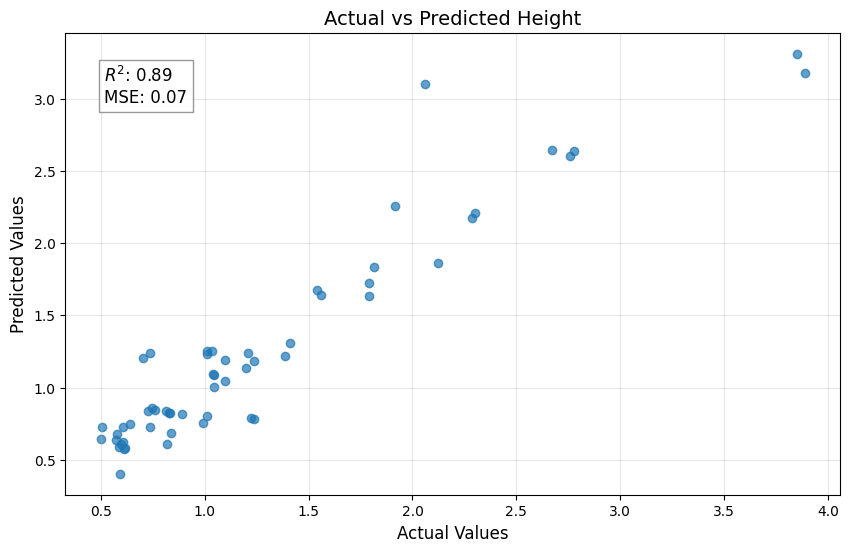

In [234]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Height', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.3)
plt.text(
    0.05, 0.85,  # 設置文字的位置 (圖的左上角)
    f'$R^2$: {r2:.2f}\nMSE: {mse:.2f}',  # 格式化 R² 和 MSE 的值
    fontsize=12,
    transform=plt.gca().transAxes,  # 使用相對坐標 (0, 0 是左下角, 1, 1 是右上角)
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')  # 添加背景框
)
plt.show()



週期

In [22]:
file_paths = ["surfline_crawl/法國大溪地.csv", "surfline_crawl/台東東河.csv", "surfline_crawl/台東金樽.csv", "surfline_crawl/印尼峇里島.csv"
              ,"surfline_crawl/宜蘭烏石港.csv", "surfline_crawl/澳洲.csv", "surfline_crawl/恆春南灣.csv"]  # Replace with your file paths
data_list = [pd.read_csv(file) for file in file_paths]
data = pd.concat(data_list, ignore_index=True)
data['swell_period_averages'] = data[['swells_0_period', 'swells_1_period', 'swells_2_period',
                               'swells_3_period', 'swells_4_period', 'swells_5_period']].replace(0, pd.NA).mean(axis=1)
data = pd.get_dummies(data, columns=['directionType'], drop_first=True)
features = data[['gust','surf_min','surf_max','speed', 'direction', 'pressure', 'temperature', 'power', 'directionType_Offshore', 'directionType_Onshore']]  
target = data['swell_period_averages']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
# Train an XGBoost model
period_xgb_model = XGBRegressor(n_estimators=60, learning_rate=0.04, max_depth=4, random_state=41)
period_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = period_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 1.144861849077334
R-squared (R^2): 0.769917368888855


In [24]:
period_xgb_model.save_model("model_period.json")

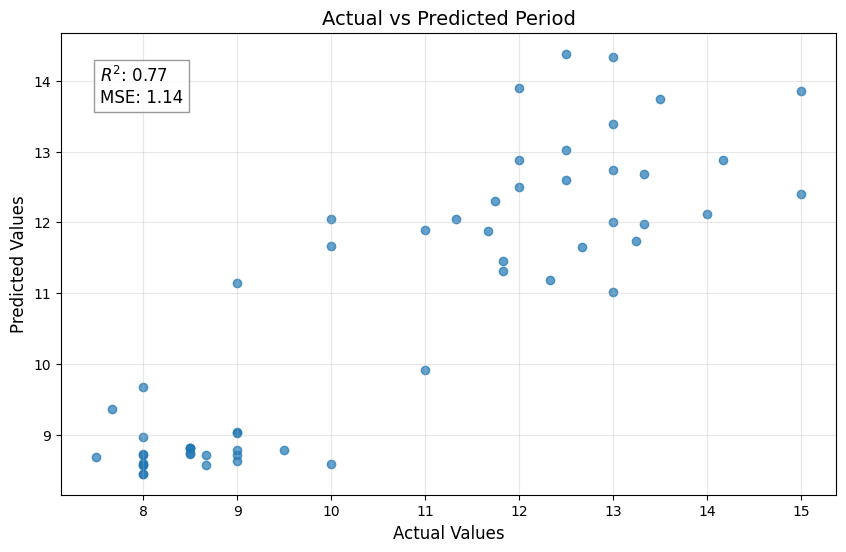

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Period', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.3)
plt.text(
    0.05, 0.85,  # 設置文字的位置 (圖的左上角)
    f'$R^2$: {r2:.2f}\nMSE: {mse:.2f}',  # 格式化 R² 和 MSE 的值
    fontsize=12,
    transform=plt.gca().transAxes,  # 使用相對坐標 (0, 0 是左下角, 1, 1 是右上角)
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')  # 添加背景框
)
plt.show()

強度

In [28]:
file_paths = ["surfline_crawl/法國大溪地.csv", "surfline_crawl/台東東河.csv", "surfline_crawl/台東金樽.csv", "surfline_crawl/印尼峇里島.csv"
              ,"surfline_crawl/宜蘭烏石港.csv", "surfline_crawl/澳洲.csv", "surfline_crawl/恆春南灣.csv"]  # Replace with your file paths
data_list = [pd.read_csv(file) for file in file_paths]
data = pd.concat(data_list, ignore_index=True)
data['swell_power_averages'] = data[['swells_0_power', 'swells_1_power', 'swells_2_power',
                               'swells_3_power', 'swells_4_power', 'swells_5_power']].replace(0, pd.NA).mean(axis=1)
#刪除極大值
data = data[data['swell_power_averages'] <= 1000]

data = pd.get_dummies(data, columns=['directionType'], drop_first=True)
features = data[['surf_min','surf_max','speed', 'direction', 'pressure', 'temperature', 'power', 'directionType_Offshore', 'directionType_Onshore']]  
target = data['swell_power_averages']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [29]:
# Train an XGBoost model
power_xgb_model = XGBRegressor(n_estimators=57, learning_rate=0.05, max_depth=4, random_state=41)
power_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = power_xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 2618.048024863034
R-squared (R^2): 0.9268808364868164


In [30]:
power_xgb_model.save_model("model_power.json")

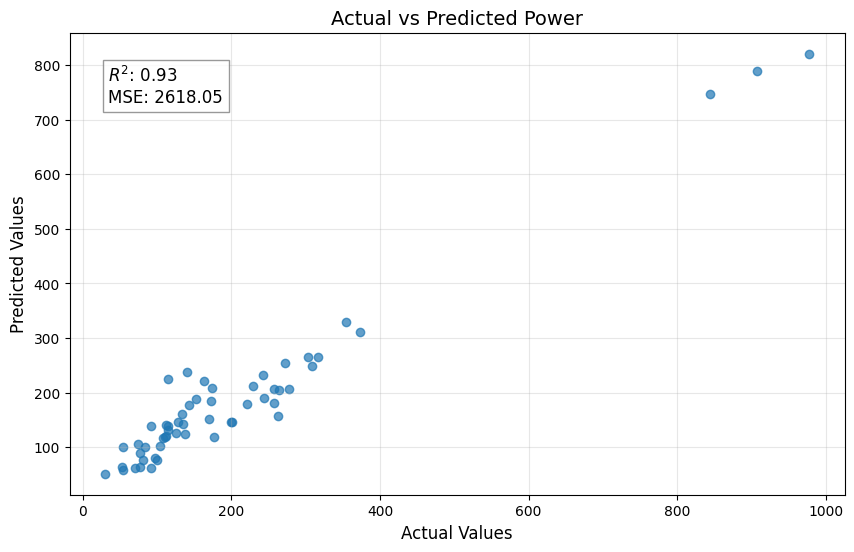

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Power', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.3)
plt.text(
    0.05, 0.85,  # 設置文字的位置 (圖的左上角)
    f'$R^2$: {r2:.2f}\nMSE: {mse:.2f}',  # 格式化 R² 和 MSE 的值
    fontsize=12,
    transform=plt.gca().transAxes,  # 使用相對坐標 (0, 0 是左下角, 1, 1 是右上角)
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')  # 添加背景框
)
plt.show()